# Step 1: Installation and Setup

In [1]:
# Installing TensorFlow
! pip install -q tensorflow-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires flatbuffers<2,>=1.12, but you have flatbuffers 23.1.4 which is incompatible.
tensorflow 2.9.2 requires keras<2.10.0,>=2.9.0rc0, but you have keras 2.11.0 which is incompatible.
tensorflow 2.9.2 requires tensorboard<2.10,>=2.9, but you have tensorboard 2.11.0 which is incompatible.
tensorflow 2.9.2 requires tensorflow-estimator<2.10.0,>=2.9.0rc0, but you have tensorflow-estimator 2.11.0 which is incompatible.


In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.11.0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing

In [5]:
# importing the dataset
from tensorflow.keras.datasets import mnist

In [6]:
# loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
x_train.shape, x_test.shape
#60000 IMAGES IN X_TRAIN AND 10000 IMAGES IN X_TEST.
#SIZE OF EACH IMAGE IS 28 X 28.

((60000, 28, 28), (10000, 28, 28))

In [8]:
y_train.shape, y_test.shape
#60000 IMAGES IN Y_TRAIN AND 10000 IMAGES IN Y_TEST.

((60000,), (10000,))

In [9]:
x_train.min(), x_train.max()

(0, 255)

In [10]:
y_train.min(), y_train.max()

(0, 9)

In [11]:
# normalize the dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

In [12]:
x_train.min(), x_train.max()

(0.0, 1.0)

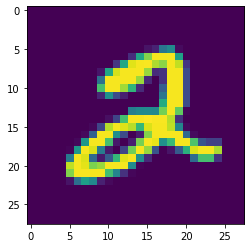

In [13]:
plt.imshow(x_train[5])

In [14]:
y_train[5]

2

# Step 3: Building the LSTM

In [15]:
# define an object (initilizing RNN)
model = tf.keras.models.Sequential()

In [16]:
# first LSTM layer
model.add(tf.keras.layers.LSTM(units=128, activation='relu', return_sequences=True, input_shape=(28, 28)))
model.add(tf.keras.layers.Dropout(0.2))
#LSTM Layer will be used to understand relationship between different layers of
#sequence.In LSTM by default activation function = tanh but here we will use ReLU.
#We want 1st LSTM Layer to return sequences.If we want to add dense layer after
#LSTM layer then we will not return sequences. But here we are having 1 more LSTM layer
#after previous LSTM layer. So return_sequences=True.
#input_shape is taken from x_train,x_test.
#dropout layer is a regularization technique to avoid overfitting.
# second LSTM layer
model.add(tf.keras.layers.LSTM(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
#in 2nd LSTM layer we don't specify return_sequences=True as we are not adding 1 more
#LSTM layer after this layer.
# fully connected layer (first dense layer)
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
# output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
#for binary output we use activation function = sigmoid.
#here we have multiple output so activation function = softmax.

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 28, 128)           80384     
                                                                 
 dropout (Dropout)           (None, 28, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                3

In [18]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
#Optimizer will find global minimum.
#Here we use Adam Optimer which is stochastic gradient descent optimizer.
#Loss function guides the optimizer to find the global minimum.
#metrics with accuracy helps to calculate accuracy.

In [20]:
# compile the model
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 4: Training the model

In [21]:
history =  model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 115s 60ms/step - loss: 0.6188 - accuracy: 0.8008 - val_loss: 0.1681 - val_accuracy: 0.9515
Epoch 2/10
1875/1875 [==============================] - 122s 65ms/step - loss: 0.1763 - accuracy: 0.9515 - val_loss: 0.0873 - val_accuracy: 0.9744
Epoch 3/10
1875/1875 [==============================] - 117s 62ms/step - loss: 0.1166 - accuracy: 0.9686 - val_loss: 0.0835 - val_accuracy: 0.9777
Epoch 4/10
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0932 - accuracy: 0.9752 - val_loss: 0.0797 - val_accuracy: 0.9799
Epoch 5/10
1875/1875 [==============================] - 112s 60ms/step - loss: 0.0771 - accuracy: 0.9793 - val_loss: 0.0832 - val_accuracy: 0.9774
Epoch 6/10
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0769 - accuracy: 0.9802 - val_loss: 0.0708 - val_accuracy: 0.9790
Epoch 7/10
1875/1875 [==============================] - 113s 60ms/step - loss: 0.0598 - accuracy: 0.9831 - val_loss: 0

In [22]:
# predictions
#y_pred = model.predict_classes(x_test)
y_pred = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 6s 19ms/step


In [23]:
print(y_pred[10]), print(y_test[10])

0
0


(None, None)

In [24]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 6s 19ms/step - loss: 0.0449 - accuracy: 0.9875


[0.04487195611000061, 0.987500011920929]

In [25]:
x_new=x_test[:6] #taking 5 values with indices 0,1,2,3,4,5. 

In [26]:
y_pred=model.predict(x_new)

1/1 [==============================] - 0s 22ms/step


In [27]:
y_pred

array([[3.58999874e-12, 4.35509717e-09, 2.83976870e-10, 1.68152867e-10,
        3.52709351e-09, 6.37713569e-13, 8.84332837e-17, 9.99999762e-01,
        1.04150716e-10, 1.98743692e-07],
       [4.27194442e-36, 1.22703887e-25, 1.00000000e+00, 2.33923882e-25,
        0.00000000e+00, 1.26905383e-34, 4.11182784e-38, 8.71669968e-31,
        1.11722734e-25, 0.00000000e+00],
       [1.15204658e-10, 9.99974012e-01, 1.74078650e-06, 1.28653454e-07,
        1.39825852e-06, 2.44378828e-08, 2.78130194e-08, 2.11242022e-05,
        1.55805787e-06, 2.47773491e-09],
       [9.82798755e-01, 1.24148903e-06, 2.09237263e-03, 4.32308734e-05,
        5.55685474e-05, 4.65597317e-04, 1.27955414e-02, 2.24651799e-08,
        1.67810079e-03, 6.96108182e-05],
       [1.69099601e-09, 4.24303259e-08, 2.23361288e-10, 1.27364141e-09,
        9.99979377e-01, 1.19864083e-07, 5.36024949e-08, 5.04654849e-07,
        1.27488153e-08, 1.98705347e-05],
       [6.74176643e-13, 9.99997735e-01, 7.13549086e-09, 9.86401294e-10,
   

In [28]:
y_test[:6]

array([7, 2, 1, 0, 4, 1], dtype=uint8)

In [29]:
y_pred.round(0)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [32]:
#we get 1 corresponding to the number it predicts.
#Numbering starts from 0 and ends at 9.
#for 1st 1 corresponds to no. 7.
#for 2nd 1 corresponds to no. 2.
#similarly for others.

# Step 5: Learning Curve

In [30]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

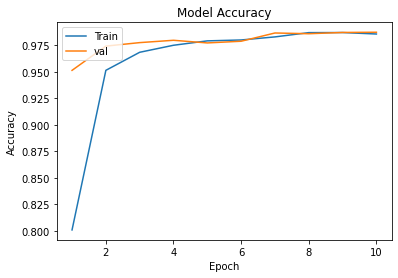

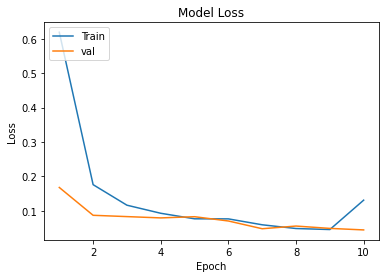

In [31]:
learning_curve(history, 10)

In [33]:
#IT IS CLEAR FROM ABOVE 2 GRAPHS THAT NO OVERFITTING OR UNDERFITTING
#OCCURS IN THE MODEL.